# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## General Trends:

1. From the scatterplot showing Latitude vs. Temperature (F), one can see a definite trend where temperature increases as one approaches 0 degrees latitude and temperature decreases as one gets further away from 0 degrees latitude.

2. From the scatterplot showing Latitude vs. Humidity (%), there is a similar trend but with humidity where humidity increases as one approaches the equator and humidity can vary again as one gets further away from the equator.

3. From the scatterplot showing Latitude vs Cloudiness (%), there seems to be a trend where cloudiness increases as one gets further away from the equator.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# This block is testing short list of cities

#cities = ['georgetown', 'Los Angeles', 'Indianapolis', 'Hong Kong', 'Taipei', 'London']

In [5]:
cities[:10]

['makakilo city',
 'kodinsk',
 'banda aceh',
 'port alfred',
 'matara',
 'ures',
 'busselton',
 'atuona',
 'airai',
 'lokot']

In [6]:
# Lists to hold relevant data
cities_with_weather_data = []
cities_with_weather_data_countries = []
longitudes = []
latitudes = []
dates = []
temperatures = []
humidities = []
cloudiness = []
wind_speeds = []
max_temperatures = []

# City index
city_index = -1

# Count of cities removed from the cities list
removed_city_count = 0

# Build partial URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through list of cities
for city in cities:
    
    # Call OpenWeather API for info on specific city
    response = requests.get(query_url + city).json()
    
    city_index = city_index + 1
    
    # Try to retrieve the city's weather data
    try:
        
        # Add city longitude to longitudes list
        longitudes.append(response['coord']['lon'])
        
        # Add city latitude to latitudes list
        latitudes.append(response['coord']['lat'])
        
        # Add time of weather data collection to date list
        dates.append(response['dt'])
        
        # Add city temperature (F) to temperatures list
        temperatures.append(response['main']['temp'])
        
        # Add city humidty (%) to humidities list
        humidities.append(response['main']['humidity'])
        
        # Add city cloudiness (%) to cloudiness list
        cloudiness.append(response['clouds']['all'])
        
        # Add city wind speed (mph) to wind_speeds list
        wind_speeds.append(response['wind']['speed'])
        
        # Add city temperature (F) to temperatures list
        max_temperatures.append(response['main']['temp_max'])
        
        # Add city whose weather data we retrieved to cities_with_weather_data list
        cities_with_weather_data.append(city)
        
        # Add city's country whose weather data we retrieved to cities_with_weather_data_country list
        cities_with_weather_data_countries.append(response['sys']['country'])
        
        # Print log of cities gathered
        print(f"Weather data for city {city_index}, {city}, retrieved.")
        
    # Handle exceptions where the OpenWeatherMap API can't retrieve the city's weather data
    except:
        
        # Print log saying something went wrong
        print(f"Something went wrong retrieving the weather data for city {city_index}, {city}, it has been removed from the list of cities.")
        
        # Increase count of removed cities
        removed_city_count = removed_city_count + 1
        
        # Pass and go to next city on cities list
        pass

Weather data for city 0, makakilo city, retrieved.
Weather data for city 1, kodinsk, retrieved.
Weather data for city 2, banda aceh, retrieved.
Weather data for city 3, port alfred, retrieved.
Weather data for city 4, matara, retrieved.
Weather data for city 5, ures, retrieved.
Weather data for city 6, busselton, retrieved.
Weather data for city 7, atuona, retrieved.
Weather data for city 8, airai, retrieved.
Weather data for city 9, lokot, retrieved.
Something went wrong retrieving the weather data for city 10, sentyabrskiy, it has been removed from the list of cities.
Weather data for city 11, rikitea, retrieved.
Weather data for city 12, mersing, retrieved.
Weather data for city 13, ylivieska, retrieved.
Weather data for city 14, mataura, retrieved.
Weather data for city 15, ekuvukeni, retrieved.
Weather data for city 16, ushuaia, retrieved.
Weather data for city 17, los llanos de aridane, retrieved.
Weather data for city 18, orsk, retrieved.
Weather data for city 19, nikolskoye, re

Weather data for city 153, asau, retrieved.
Weather data for city 154, charyshskoye, retrieved.
Weather data for city 155, whyalla, retrieved.
Weather data for city 156, south venice, retrieved.
Weather data for city 157, sainthia, retrieved.
Weather data for city 158, talaya, retrieved.
Weather data for city 159, navirai, retrieved.
Something went wrong retrieving the weather data for city 160, samusu, it has been removed from the list of cities.
Weather data for city 161, cayenne, retrieved.
Weather data for city 162, sao filipe, retrieved.
Weather data for city 163, lake forest, retrieved.
Weather data for city 164, palmer, retrieved.
Weather data for city 165, victoria, retrieved.
Something went wrong retrieving the weather data for city 166, umm durman, it has been removed from the list of cities.
Weather data for city 167, turukhansk, retrieved.
Weather data for city 168, lompoc, retrieved.
Weather data for city 169, khatanga, retrieved.
Weather data for city 170, ilulissat, retr

Weather data for city 303, santo antonio do ica, retrieved.
Weather data for city 304, souillac, retrieved.
Weather data for city 305, korla, retrieved.
Weather data for city 306, grindavik, retrieved.
Weather data for city 307, burkburnett, retrieved.
Weather data for city 308, grand junction, retrieved.
Weather data for city 309, tomatlan, retrieved.
Weather data for city 310, yol, retrieved.
Something went wrong retrieving the weather data for city 311, sinkat, it has been removed from the list of cities.
Weather data for city 312, chichli, retrieved.
Weather data for city 313, bambanglipuro, retrieved.
Weather data for city 314, saint-philippe, retrieved.
Weather data for city 315, berlevag, retrieved.
Weather data for city 316, unity, retrieved.
Weather data for city 317, la carolina, retrieved.
Weather data for city 318, vardo, retrieved.
Weather data for city 319, barcelona, retrieved.
Weather data for city 320, longyearbyen, retrieved.
Weather data for city 321, cabo san lucas,

Weather data for city 463, tatsuno, retrieved.
Weather data for city 464, sinnamary, retrieved.
Weather data for city 465, shingu, retrieved.
Weather data for city 466, lovington, retrieved.
Something went wrong retrieving the weather data for city 467, bolshegrivskoye, it has been removed from the list of cities.
Weather data for city 468, tarauaca, retrieved.
Weather data for city 469, lakes entrance, retrieved.
Weather data for city 470, chekhov, retrieved.
Weather data for city 471, belaya gora, retrieved.
Weather data for city 472, ambilobe, retrieved.
Weather data for city 473, walcz, retrieved.
Weather data for city 474, dunhua, retrieved.
Something went wrong retrieving the weather data for city 475, dolbeau, it has been removed from the list of cities.
Weather data for city 476, bilibino, retrieved.
Weather data for city 477, bubaque, retrieved.
Weather data for city 478, priargunsk, retrieved.
Something went wrong retrieving the weather data for city 479, sumbawa, it has been

In [7]:
removed_city_count

45

In [8]:
len(cities_with_weather_data)

557

In [9]:
len(cities)

602

In [10]:
len(temperatures)

557

In [11]:
len(humidities)

557

In [12]:
len(cloudiness)

557

In [13]:
len(wind_speeds)

557

In [14]:
len(latitudes)

557

In [15]:
temperatures[:10]

[78.87, 43.86, 85.08, 60.66, 85.64, 74.62, 64.99, 79.52, 72.82, 55.51]

In [16]:
humidities[:10]

[47, 32, 73, 85, 72, 36, 65, 66, 50, 90]

In [17]:
cloudiness[:10]

[1, 14, 100, 97, 99, 0, 100, 6, 90, 33]

In [18]:
wind_speeds[:10]

[10.36, 8.68, 4.29, 16.2, 10.58, 1.99, 1.01, 15.99, 4.52, 5.59]

In [19]:
latitudes[:10]

[21.3469,
 58.6881,
 5.5577,
 -33.5906,
 5.9485,
 29.4333,
 -33.65,
 -9.8,
 -8.9266,
 52.565]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# Create dictionary of weather info in cities
weather_dict = {"City": cities_with_weather_data,
                "Country": cities_with_weather_data_countries,
                "Longitude": longitudes,
                "Latitude": latitudes,
                "Date": dates,
                "Temperature (F)": temperatures,
                "Humidity (%)": humidities,
                "Cloudiness (%)": cloudiness,
                "Wind Speed (mph)": wind_speeds,
                "Max Temperature (F)": max_temperatures}

# Convert weather_dict into dataframe
weather_data_df = pd.DataFrame(weather_dict)

# Export dataframe to csv
weather_data_df.to_csv("../output_data/weather_data.csv", index=False, header=True)

# Display dataframe
weather_data_df.head()

,City,Country,Longitude,Latitude,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Max Temperature (F)
0,makakilo city,US,-158.0858,21.3469,1621136648,78.87,47,1,10.36,82.40
1,kodinsk,RU,99.1844,58.6881,1621136648,43.86,32,14,8.68,43.86
2,banda aceh,ID,95.3222,5.5577,1621136648,85.08,73,100,4.29,85.08
3,port alfred,ZA,26.8910,-33.5906,1621136649,60.66,85,97,16.20,60.66
4,matara,LK,80.5353,5.9485,1621136649,85.64,72,99,10.58,85.64


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#  Get the indices of cities that have humidity over 100%.

humidity_over_100_indices = weather_data_df.index[weather_data_df["Humidity (%)"] > 100]

#humidity_over_100 = weather_data_df["Humidity (%)"] > 100
#humidity_over_100_indices = index[humidity_over_100]
humidity_over_100_indices_list = humidity_over_100_indices.tolist()
humidity_over_100_indices_list

[]

In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data_df.drop(humidity_over_100_indices_list, inplace=False)
clean_city_data.reset_index(drop=True, inplace=True)

In [23]:
clean_city_data

,City,Country,Longitude,Latitude,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Max Temperature (F)
0,makakilo city,US,-158.0858,21.3469,1621136648,78.87,47,1,10.36,82.40
1,kodinsk,RU,99.1844,58.6881,1621136648,43.86,32,14,8.68,43.86
2,banda aceh,ID,95.3222,5.5577,1621136648,85.08,73,100,4.29,85.08
3,port alfred,ZA,26.8910,-33.5906,1621136649,60.66,85,97,16.20,60.66
4,matara,LK,80.5353,5.9485,1621136649,85.64,72,99,10.58,85.64
...,...,...,...,...,...,...,...,...,...,...
552,cozumel,MX,-86.9458,20.5083,1621136687,80.28,78,75,6.91,80.60
553,jieshi,CN,115.8257,22.8134,1621136855,85.46,73,4,13.31,85.46
554,kostek,RU,46.8541,43.3439,1621136855,70.70,52,57,10.54,70.70
555,srandakan,ID,110.2506,-7.9386,1621136856,85.64,66,28,13.15,85.64


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

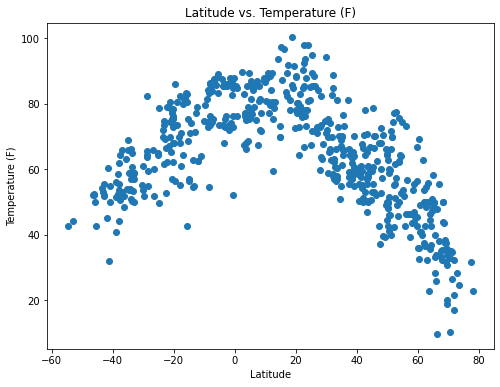

In [24]:
# Create and set figure size
fig1, ax1 = plt.subplots(figsize=(8,6));

# Create scatterplot
ax1.scatter(latitudes, clean_city_data["Temperature (F)"]);

# Set chart title and labels
ax1.set_title('Latitude vs. Temperature (F)');
ax1.set_xlabel('Latitude');
ax1.set_ylabel('Temperature (F)');

# Save chart as .png
plt.savefig("../output_data/latitude_vs_temperature_plot.png")

### Analysis:

The code is creating a scatterplot of latitude vs temperature. We're taking every city's latitude and temperature and comparing it to the other cities. The general trend is that temperature increases as one approaches the equator, and temperature drops the further one gets from the equator.

## Latitude vs. Humidity Plot

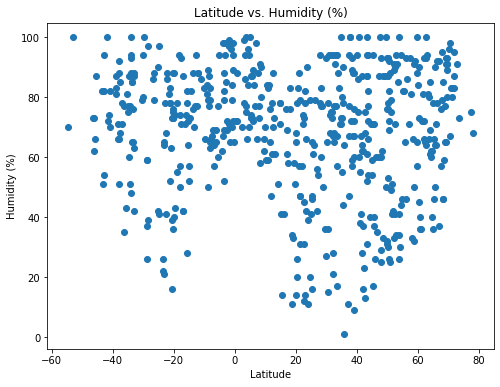

In [25]:
# Create and set figure size
fig2, ax2 = plt.subplots(figsize=(8,6));

# Create scatterplot
ax2.scatter(latitudes, clean_city_data["Humidity (%)"]);

# Set chart title and labels
ax2.set_title('Latitude vs. Humidity (%)');
ax2.set_xlabel('Latitude');
ax2.set_ylabel('Humidity (%)');

# Save chart as .png
plt.savefig("../output_data/latitude_vs_humidity_plot.png")

### Analysis:

The code is creating a scatterplot of latitude vs humidity. We're taking every city's latitude and humidity and comparing it to the other cities. Around the equator, there seems to be almost no cities with low humidity.

## Latitude vs. Cloudiness Plot

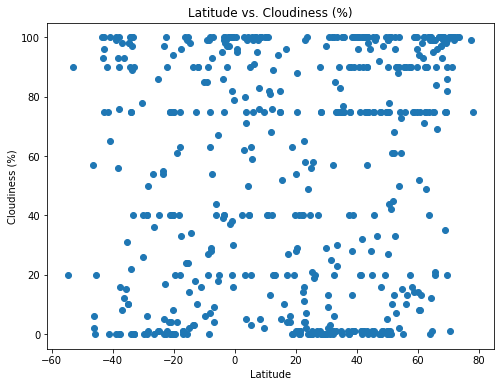

In [26]:
# Create and set figure size
fig3, ax3 = plt.subplots(figsize=(8,6));

# Create scatterplot
ax3.scatter(latitudes, clean_city_data["Cloudiness (%)"]);

# Set chart title and labels
ax3.set_title('Latitude vs. Cloudiness (%)');
ax3.set_xlabel('Latitude');
ax3.set_ylabel('Cloudiness (%)');

# Save chart as .png
plt.savefig("../output_data/latitude_vs_cloudiness_plot.png")

### Analysis:

The code is creating a scatterplot of latitude vs cloudiness. We're taking every city's latitude and cloudiness and comparing it to the other cities. There seems to be a slight trend where cloudiness increases asone gets away from the equator.

## Latitude vs. Wind Speed Plot

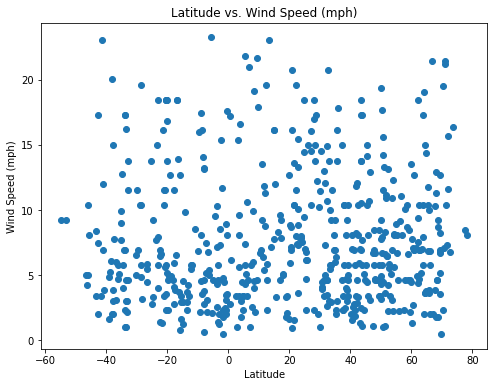

In [27]:
# Create and set figure size
fig4, ax4 = plt.subplots(figsize=(8,6));

# Create scatterplot
ax4.scatter(latitudes, clean_city_data["Wind Speed (mph)"]);

# Set chart title and labels
ax4.set_title('Latitude vs. Wind Speed (mph)');
ax4.set_xlabel('Latitude');
ax4.set_ylabel('Wind Speed (mph)');

# Save chart as .png
plt.savefig("../output_data/latitude_vs_wind_speed_plot.png")

### Analysis:

The code is creating a scatterplot of latitude vs wind speed. We're taking every city's latitude and wind speed and comparing it to the other cities. There does not seem to be any correlation between the two variables.

## Linear Regression

In [28]:
northern_hemisphere = clean_city_data[clean_city_data['Latitude'] >= 0]
northern_hemisphere.reset_index(inplace=True)
northern_hemisphere

,index,City,Country,Longitude,Latitude,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Max Temperature (F)
0,0,makakilo city,US,-158.0858,21.3469,1621136648,78.87,47,1,10.36,82.40
1,1,kodinsk,RU,99.1844,58.6881,1621136648,43.86,32,14,8.68,43.86
2,2,banda aceh,ID,95.3222,5.5577,1621136648,85.08,73,100,4.29,85.08
3,4,matara,LK,80.5353,5.9485,1621136649,85.64,72,99,10.58,85.64
4,5,ures,MX,-110.4000,29.4333,1621136650,74.62,36,0,1.99,79.00
...,...,...,...,...,...,...,...,...,...,...,...
367,551,sterling,US,-77.4286,39.0062,1621136854,54.84,76,1,3.85,57.00
368,552,cozumel,MX,-86.9458,20.5083,1621136687,80.28,78,75,6.91,80.60
369,553,jieshi,CN,115.8257,22.8134,1621136855,85.46,73,4,13.31,85.46
370,554,kostek,RU,46.8541,43.3439,1621136855,70.70,52,57,10.54,70.70


In [29]:
southern_hemisphere = clean_city_data[clean_city_data['Latitude'] < 0]
southern_hemisphere.reset_index(inplace=True)
southern_hemisphere

,index,City,Country,Longitude,Latitude,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Max Temperature (F)
0,3,port alfred,ZA,26.8910,-33.5906,1621136649,60.66,85,97,16.20,60.66
1,6,busselton,AU,115.3333,-33.6500,1621136650,64.99,65,100,1.01,64.99
2,7,atuona,PF,-139.0333,-9.8000,1621136650,79.52,66,6,15.99,79.52
3,8,airai,TL,125.4092,-8.9266,1621136651,72.82,50,90,4.52,72.82
4,10,rikitea,PF,-134.9692,-23.1203,1621136616,74.79,65,97,18.41,74.79
...,...,...,...,...,...,...,...,...,...,...,...
180,542,olinda,BR,-34.8553,-8.0089,1621136851,73.40,83,75,4.61,73.40
181,543,palu,ID,119.8707,-0.8917,1621136852,86.92,79,82,3.09,86.92
182,546,tres arroyos,AR,-60.2798,-38.3739,1621136853,52.47,71,93,6.06,52.47
183,549,kalabo,ZM,22.6814,-14.9700,1621136854,56.57,57,14,4.54,56.57


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the regression line is: y = -0.91x + 96.75


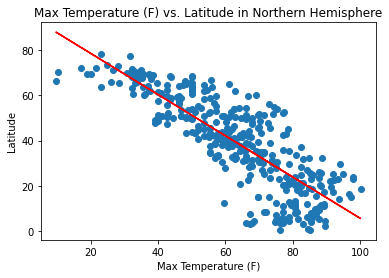

In [30]:
# Plot of Max Temp vs Latitude in the northern hemisphere
x_values = northern_hemisphere['Max Temperature (F)']
y_values = northern_hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Max Temperature (F) vs. Latitude in Northern Hemisphere')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the regression line is: y = 0.81x + -75.62


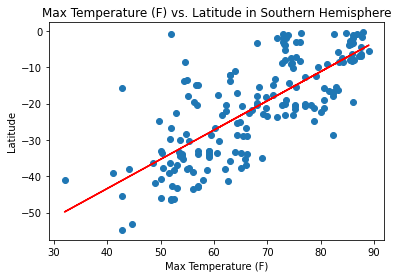

In [31]:
# Plot of Max Temp vs Latitude in the southern hemisphere
x_values = southern_hemisphere['Max Temperature (F)']
y_values = southern_hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Max Temperature (F) vs. Latitude in Southern Hemisphere')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
print(f"The equation of the regression line is: {line_eq}")
plt.show()

### Analysis:

The code is creating a scatterplot of max temperature vs latitude in both the northern and southern hemispheres. The data shows a general trend that as one approaches the equator (0 degrees) the max temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.04x + 36.86


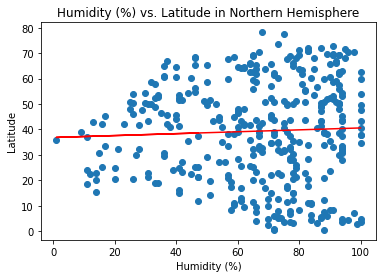

In [32]:
# Plot of Humidity vs Latitude in the northern hemisphere
x_values = northern_hemisphere['Humidity (%)']
y_values = northern_hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Humidity (%) vs. Latitude in Northern Hemisphere')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.06x + -25.28


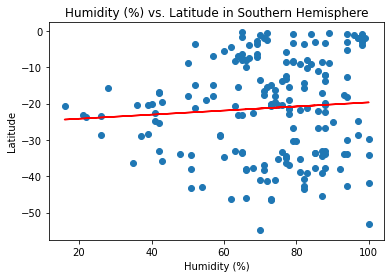

In [33]:
# Plot of Humidity vs Latitude in the southern hemisphere
x_values = southern_hemisphere['Humidity (%)']
y_values = southern_hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Humidity (%) vs. Latitude in Southern Hemisphere')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The equation of the regression line is: {line_eq}")
plt.show()

### Analysis:

The code is creating a scatterplot of humidity vs latitude in both the northern and southern hemispheres. The data appears to be pretty random with a slightly positive correlation in both the hemispheres implying the further north, the higher the humidity. Again however, there is only a very weak, almost non-existent correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.1x + 33.69


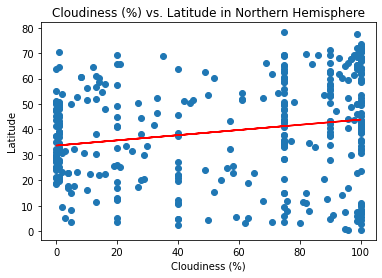

In [34]:
# Plot of Cloudiness vs Latitude in the northern hemisphere
x_values = northern_hemisphere['Cloudiness (%)']
y_values = northern_hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Cloudiness (%) vs. Latitude in Northern Hemisphere')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.03x + -22.86


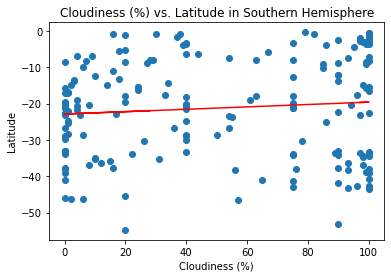

In [35]:
# Plot of Cloudiness vs Latitude in the southern hemisphere
x_values = southern_hemisphere['Cloudiness (%)']
y_values = southern_hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Cloudiness (%) vs. Latitude in Southern Hemisphere')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The equation of the regression line is: {line_eq}")
plt.show()

### Analysis:

The code is creating a scatterplot of cloudiness vs latitude in both the northern and southern hemispheres. The data suggests lack of a pattern in both hemispheres and suggests that there is no relationship between cloudiness and how far it is from the hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the regression line is: y = -0.13x + 40.43


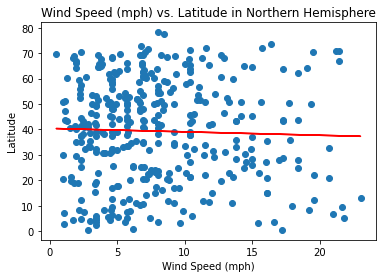

In [36]:
# Plot of Wind Speed vs Latitude in the northern hemisphere
x_values = northern_hemisphere['Wind Speed (mph)']
y_values = northern_hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Wind Speed (mph) vs. Latitude in Northern Hemisphere')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the regression line is: y = -0.24x + -19.47


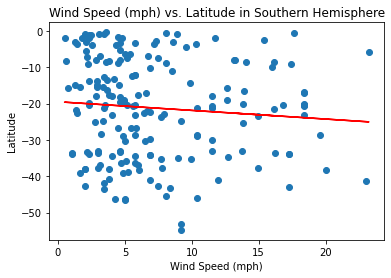

In [37]:
# Plot of Wind Speed vs Latitude in the southern hemisphere
x_values = southern_hemisphere['Wind Speed (mph)']
y_values = southern_hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Wind Speed (mph) vs. Latitude in Southern Hemisphere')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The equation of the regression line is: {line_eq}")
plt.show()

### Analysis:

The code is creating a scatterplot of wind speed vs latitude in both the northern and southern hemispheres. Again, the data does not appear to have much of a pattern or linear relationship. Although the southern hemisphere has a stronger negative correlation than the northern hemisphere.